# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
import json
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36819.90
The current value of your 5.3 ETH is $10963.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ='v2'
)

In [8]:
# Format current date as ISO format
# Use yesterday as Alpaca does not allow data query within last 15 min
from datetime import date, timedelta
current_date = date.today() - timedelta(1)
current_date = current_date.isoformat()

# current_date = pd.Timestamp("2022-07-19", tz="America/New_York").isoformat()

print(current_date)
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

2022-07-19


In [9]:
# Get current closing prices for SPY and AGG
df = alpaca.get_bars(
    tickers,
    timeframe= timeframe,
    start = current_date,
    end = current_date
).df

# Reorganize the DataFrame
AGG = df[df['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df[df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df2 = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
df2

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2022-07-19 04:00:00+00:00  101.95  101.99  101.6615  101.78  4240277   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-07-19 04:00:00+00:00       18210  101.821971  386.17  392.87  385.4   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-19 04:00:00+00:00  392.27  78242523      533601  389.362273

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df2['AGG']['close'])
spy_close_price = float(df2['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.78
Current SPY closing price: $392.27


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19613.50
The current value of your 200 AGG shares is $20356.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings= pd.DataFrame(index= ['crypto','shares'], columns=['amount'])

df_savings.loc['crypto','amount']= round(my_crypto_value,2)
df_savings.loc['shares','amount']= round(my_shares_value,2)

# Display savings DataFrame
display(df_savings)

,amount
crypto,47783.22
shares,39969.5


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

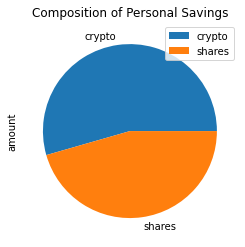

In [13]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = my_crypto_value + my_shares_value

# Validate saving health
if my_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif my_savings == emergency_fund:
    print('Congratulations! You have reached emergency fund.')
else:
    print(f'Good job! You are on track. Save ${emergency_fund - my_savings} more to your emergency fund.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_5yr = alpaca.get_bars(
    tickers,
    timeframe= timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
AGG = df_5yr[df_5yr['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_5yr[df_5yr['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.38  242.2100   
2017-07-05 04:00:00+00:00       12388  109.122387  242.61  243.01  241.7000   
2017-07-06 04:00:00+00:00       10712  108.928442  241.86  242.03  240.3400   
2017-07-07 04:00:00+00:00        9963  108.889505  241.18  242.28  240.5645   
2017-07-10 04:00:00+00:00        9654  108.953151  241.98  242.80  241.7600   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-07-03 04:00:00+00:00  242.21  39153806      134045  242.802969  
2017-07-05 04:00:00+00:00  242.77  54427596      184987  242.525892  
2017-07-06 04:00:00+00:00  240.55  66115317      243341  241.125448  
2017-07-07 04:00:00+00:00  242.11  57972268      170407  241.801297  
2017-07-10 04:00:00+00:00  242.37  36663274      138842  242.377829

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr= MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.60,0.40],
    num_simulation=500,
    num_trading_days=252*30
)

In [18]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Duc L\iCloudDrive\07_Fintech 2022\wk06_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001937,0.996626,0.996143,1.000777,0.997595,1.003374,0.994743,0.995451,1.000930,1.005701,...,1.008318,1.005234,1.015060,1.002905,1.006215,0.999506,0.997362,1.004208,0.998279,0.987646
2,1.007166,0.999512,0.988180,1.004807,0.997021,1.003592,0.981561,0.998343,1.002278,1.003461,...,1.020032,0.997248,1.008372,1.009613,1.007077,1.004030,0.986207,1.000897,1.002045,0.984919
3,1.001243,0.999181,0.994189,1.001032,1.001652,0.997097,0.981311,0.991812,1.013519,0.998532,...,1.015540,0.996433,1.009660,1.008065,1.001299,1.008742,0.986495,1.003288,1.005069,0.986300
4,1.004380,1.000979,0.996044,0.994819,1.008393,0.999176,0.988174,0.998431,1.019593,0.995071,...,1.016969,0.989411,1.017533,1.009958,0.997648,1.008948,0.990506,1.000104,1.008091,0.988289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.294828,1.808324,3.029083,2.122897,3.281547,6.029389,3.114461,2.880098,1.468037,2.529601,...,3.157586,0.946259,2.690148,5.887715,4.341938,1.546203,5.048850,1.419790,1.552103,8.719936
7557,8.222709,1.820602,3.041871,2.125479,3.289632,6.031468,3.114342,2.898722,1.463939,2.554104,...,3.151004,0.950950,2.692102,5.891575,4.298035,1.563268,5.076570,1.417239,1.564937,8.735282
7558,8.155615,1.817635,3.042258,2.116720,3.313336,6.044699,3.120403,2.908745,1.464463,2.532408,...,3.148880,0.946204,2.708099,5.877061,4.298679,1.565758,5.076209,1.402243,1.541846,8.749296
7559,8.111911,1.814700,3.040665,2.097306,3.318604,5.993923,3.114031,2.900523,1.472103,2.536451,...,3.157261,0.953401,2.699927,5.858953,4.319285,1.569341,5.082907,1.397579,1.545289,8.706350


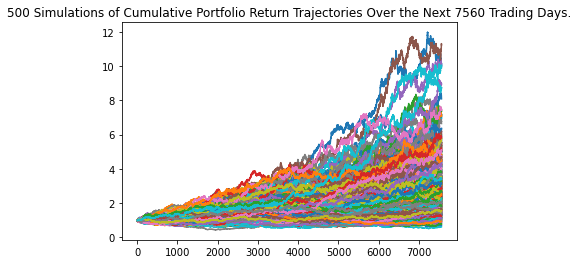

In [20]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()

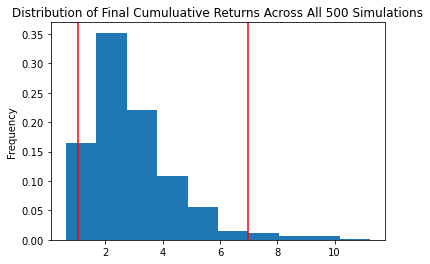

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30yr = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_30yr)

count           500.000000
mean              2.975185
std               1.530630
min               0.615566
25%               1.944759
50%               2.629128
75%               3.559483
max              11.238718
95% CI Lower      1.056221
95% CI Upper      6.992244
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * tbl_30yr[8]
ci_upper = initial_investment * tbl_30yr[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21124.42187661362 and $139844.87846411124


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * tbl_30yr[8]
ci_upper = initial_investment * tbl_30yr[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $31686.632814920427 and $209767.3176961669


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.60,0.40],
    num_simulation=500,
    num_trading_days=252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Duc L\iCloudDrive\07_Fintech 2022\wk06_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002372,0.993880,1.003783,0.995176,0.999815,0.997807,1.000242,0.999962,1.005484,0.986912,...,0.993963,1.006496,0.993007,0.992339,1.002059,1.002988,0.997741,1.013320,1.003726,0.998949
2,1.001047,0.994506,1.003554,0.993639,0.997387,1.002959,1.006498,1.009026,1.003008,0.997510,...,0.994601,0.998226,0.996377,0.993781,0.999345,0.998890,0.991381,1.014787,1.004950,1.008853
3,1.000397,0.998654,1.003936,0.994533,0.999900,1.001181,1.007899,0.998703,1.006901,1.000947,...,0.979766,0.990126,0.996333,0.988550,0.994215,0.995787,0.994019,1.019292,1.005924,1.011775
4,0.998583,0.991494,1.007497,0.992540,1.002363,0.991895,1.009269,0.997378,1.011747,1.003191,...,0.984870,0.989577,1.000009,0.986891,0.996356,0.988291,0.985461,1.024580,1.010976,1.017213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.931980,1.087621,1.364463,1.218726,1.152580,1.028657,1.275846,1.038846,1.128351,1.110960,...,1.224329,1.561279,1.170596,1.036296,1.324182,2.160344,1.118277,1.093769,1.779339,1.053079
1257,0.938937,1.092347,1.367533,1.221802,1.155503,1.029669,1.279638,1.041630,1.130949,1.106286,...,1.222521,1.565911,1.164377,1.035522,1.316472,2.158918,1.125346,1.082965,1.771739,1.060345
1258,0.936639,1.101741,1.371049,1.225123,1.155584,1.029619,1.275798,1.043003,1.116574,1.106976,...,1.215256,1.552672,1.162675,1.039081,1.317887,2.155811,1.130687,1.096809,1.773763,1.069878
1259,0.930711,1.099576,1.379101,1.229503,1.170366,1.021355,1.269307,1.040713,1.129076,1.109799,...,1.220016,1.572907,1.168002,1.038917,1.327886,2.177493,1.133541,1.093936,1.783206,1.068307


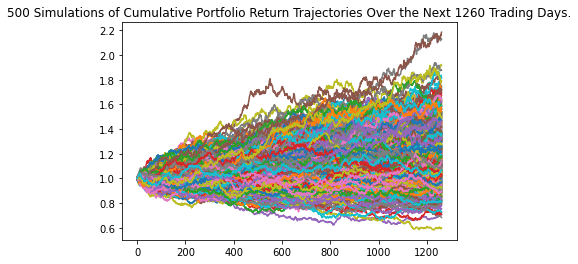

In [27]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr.plot_simulation()

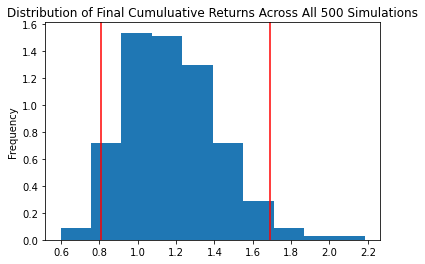

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5yr.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.181453
std               0.237548
min               0.597985
25%               1.009624
50%               1.157764
75%               1.331078
max               2.184474
95% CI Lower      0.809048
95% CI Upper      1.691613
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_5yr = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment_5yr * tbl_5yr[8]
ci_upper_five = initial_investment_5yr * tbl_5yr[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $80904.78358557154 and $169161.29339601222


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# 80% shares, 20% bonds
MC_10yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days= 252*10   
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Duc L\iCloudDrive\07_Fintech 2022\wk06_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001746,1.002392,0.997549,1.009255,1.010854,1.001905,0.994114,0.989278,0.993853,0.999327,...,0.974491,0.999223,1.012112,1.003778,0.983867,0.995198,1.022344,1.003878,0.985554,0.990089
2,0.987877,0.986679,0.985682,1.027137,1.001229,1.010987,0.997225,0.981606,0.993056,0.980173,...,0.985378,0.990097,1.017582,0.988447,0.981692,1.013171,1.021417,1.009899,0.983107,0.990002
3,0.996440,0.982324,0.981921,1.030360,0.997884,1.012135,1.000934,0.978200,0.981009,1.007137,...,0.988947,1.006869,1.019394,0.985894,0.997015,1.033729,1.036386,1.002925,0.987670,0.987893
4,0.992407,0.985104,0.979040,1.048242,1.010802,1.016154,0.997941,0.978327,0.983508,0.997745,...,1.004883,1.006227,1.008540,0.980739,1.009401,1.036663,1.049106,0.985077,0.991032,0.985148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.806748,4.834300,3.064674,2.113328,2.750183,3.034602,1.688852,1.418797,3.706490,1.957126,...,1.874483,0.896353,2.397620,1.036362,1.700302,2.599033,4.788211,1.766905,1.478314,1.376574
2517,1.829870,4.917967,3.069848,2.108496,2.757903,2.994192,1.675930,1.407606,3.730019,1.984268,...,1.886590,0.894352,2.429272,1.041187,1.716336,2.588049,4.860314,1.773940,1.492261,1.378070
2518,1.795994,4.945387,3.066968,2.134210,2.720502,3.015982,1.673324,1.385123,3.700827,1.995886,...,1.896621,0.882490,2.438724,1.031905,1.715991,2.613007,4.827812,1.768844,1.472955,1.343870
2519,1.801684,4.938059,3.039029,2.143461,2.755397,3.050050,1.679747,1.389771,3.756728,2.010125,...,1.867306,0.889227,2.478280,1.029060,1.723495,2.612382,4.909075,1.779743,1.474602,1.354891


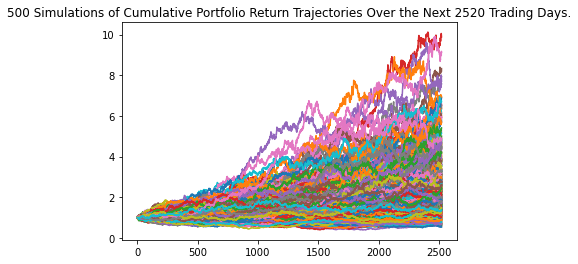

In [33]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr.plot_simulation()

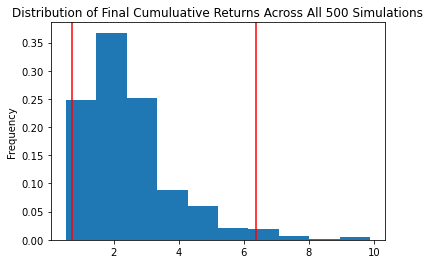

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10yr.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              2.479570
std               1.409165
min               0.531513
25%               1.492031
50%               2.188993
75%               3.010778
max               9.889200
95% CI Lower      0.707643
95% CI Upper      6.368932
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment_10yr = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment_10yr * tbl_10yr[8]
ci_upper_ten = initial_investment_10yr * tbl_10yr[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $300000 in the portfolio over the next 10 years will end within in the range of $212293.0375037866 and $1910679.7285821326
